In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
plt.rcParams.update({'font.size': 16})
import glob
import matplotlib.cm as cm

In [2]:
import torch
import numpy as np
import networkx as nx
import os

from floorplans.lidar.lidar import Lidar2D, OnlineTrajectoryLidarDataset

In [3]:
results_dir = "../results/2024-07-30_19-18_dist_online_dense_tight"


results1 = torch.load(os.path.join(results_dir, "dinno_log_results.pt"), map_location=torch.device("cpu"))
results2 = torch.load(os.path.join(results_dir, "sonata_results.pt"), map_location=torch.device("cpu"))
results3 = torch.load(os.path.join(results_dir, "kgt_results.pt"), map_location=torch.device("cpu"))
results4= torch.load(os.path.join(results_dir, "dsgt_results.pt"), map_location=torch.device("cpu"))


# results_solo = torch.load(os.path.join(results_dir2, "solo_results.pt"), map_location=torch.device("cpu"))


# Validation loss

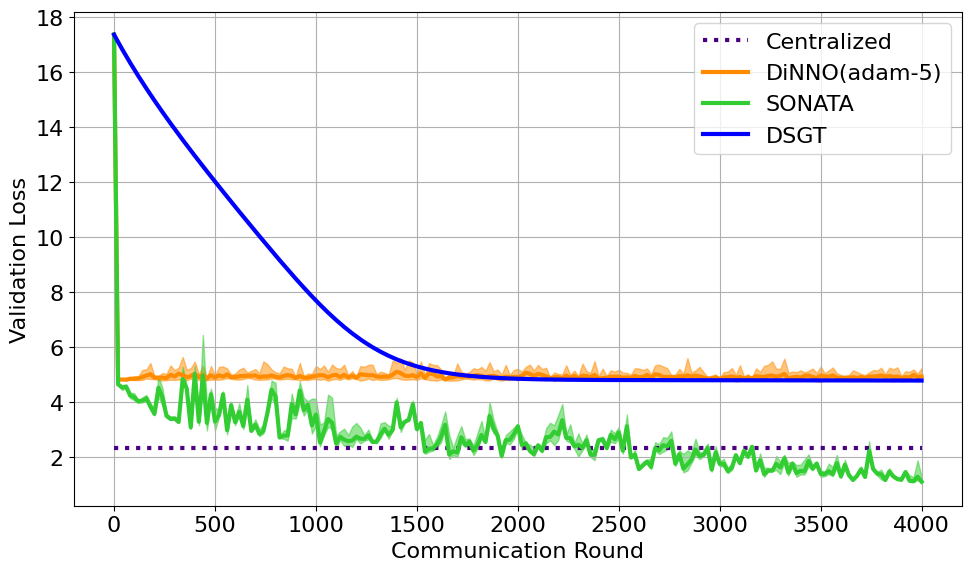

In [5]:
vl1 = torch.stack(results1["validation_loss"])
vl2 = torch.stack(results2["validation_loss"])
vl3 = torch.stack(results3["validation_loss"])
vl4 = torch.stack(results4["validation_loss"])

(fig, ax) = plt.subplots(figsize=(10, 6), tight_layout=True)

t = np.arange(vl1.shape[0]) * 20

#ind_color = "cornflowerblue"
#for i in results_solo.keys():
#    if i != 0:
#        ax.plot(t, results_solo[i]["validation_loss"] * np.ones_like(t),
#            color=ind_color, linestyle=":", linewidth=3)
#ax.plot(t, results_solo[0]["validation_loss"] * np.ones_like(t), 
#    color=ind_color, linestyle=":", label="Individual", linewidth=3)

centralized_vloss = 2.34
ax.plot(t, centralized_vloss * np.ones_like(t), color="indigo",
    linestyle=":", linewidth=3, label="Centralized")

cadmm_mean = torch.mean(vl1, dim=1)
cadmm_min = torch.amin(vl1, dim=1)
cadmm_max = torch.amax(vl1, dim=1)
sonata_mean = torch.mean(vl2, dim=1)
sonata_min = torch.amin(vl2, dim=1)
sonata_max = torch.amax(vl2, dim=1)

kgt_mean = torch.mean(vl3, dim=1)
kgt_min = torch.amin(vl3, dim=1)
kgt_max = torch.amax(vl3, dim=1)
dsgt_mean= torch.mean(vl4,dim=1)
dsgt_min = torch.amin(vl4, dim=1)
dsgt_max = torch.amax(vl4, dim=1)


cadmm_color = "darkorange"
sonata_color = "limegreen"
kgt_color = "purple"
dsgt_color="blue"
sonata_m_color="red"
sonata_s_color="green"
randcom_color="black"
ax.plot(t, cadmm_mean, color=cadmm_color, linewidth=3, label="DiNNO(adam-5)")
ax.plot(t, sonata_mean, color=sonata_color, linewidth=3, label="SONATA")
# ax.plot(t, kgt_mean, color=kgt_color, linewidth=3, label="KGT")
ax.plot(t, dsgt_mean, color=dsgt_color, linewidth=3, label="DSGT")



ax.fill_between(t, cadmm_min, cadmm_max, color=cadmm_color, alpha=0.5)
ax.fill_between(t, dsgt_min, dsgt_max, color=dsgt_color, alpha=0.5)
ax.fill_between(t, sonata_min, sonata_max, color=sonata_color, alpha=0.5)
# ax.fill_between(t, kgt_min, kgt_max, color=kgt_color, alpha=0.5)
# ax.set_yscale("log")
ax.grid()
ax.legend()
ax.set_xlabel("Communication Round")
ax.set_ylabel("Validation Loss")

fig.savefig("odense_vloss.svg")

In [6]:
print(dsgd_mean)

tensor([17.3611,  4.5633,  4.4679,  4.0909,  4.4740,  4.7737,  4.0160,  4.2634,
         4.3070,  3.6360,  4.2289,  3.9454,  3.4467,  3.8222,  3.9763,  3.2120,
         3.8339,  3.9410,  3.0242,  3.4791,  3.5468,  2.9632,  3.4975,  3.0313,
         2.8089,  3.3469,  2.9843,  2.6745,  4.4491,  4.0152,  3.4839,  4.9198,
         3.3054,  2.5822,  3.6846,  3.1680,  2.4598,  2.4622,  2.6212,  3.2730,
         4.5070,  2.8283,  2.3364,  3.2282,  3.1330,  3.0753,  2.9276,  3.3481,
         3.6446,  2.9783,  4.4876,  2.7577,  2.4081,  2.7983,  3.4468,  2.4924,
         2.3111,  2.7485,  3.1866,  3.8978,  3.5245,  2.0378,  3.1550,  4.0754,
         2.4362,  4.3314,  3.2061,  2.2215,  2.5085,  3.2518,  2.2376,  2.4808,
         2.8154,  2.6292,  2.5406,  2.1801,  2.2890,  2.9083,  2.0624,  2.0189,
         3.0736,  2.3412,  1.9942,  2.1462,  2.0611,  1.7587,  3.6332,  3.1418,
         1.9967,  2.3031,  2.5590,  1.9009,  2.3439,  2.4306,  1.8309,  2.1704,
         2.2316,  2.8261,  2.1621,  2.12

# Density Plots

In [8]:
# Settings
data_dir = "../floorplans/32_data"
waypoint_subdir = "minimal_overlap"
img_path = os.path.join(data_dir, "floor_img.png")
num_beams = 20
beam_samps = 25
beam_length = 0.2
spline_res = 30
samp_distribution_factor = 1.0
collision_samps = 50
fine_samps = 3
num_scans_in_window = 30
spline_res = 30

# Setup Lidar Object
lidar = Lidar2D(img_path, num_beams, beam_length, beam_samps,
    samp_distribution_factor, collision_samps, fine_samps, border_width=30)

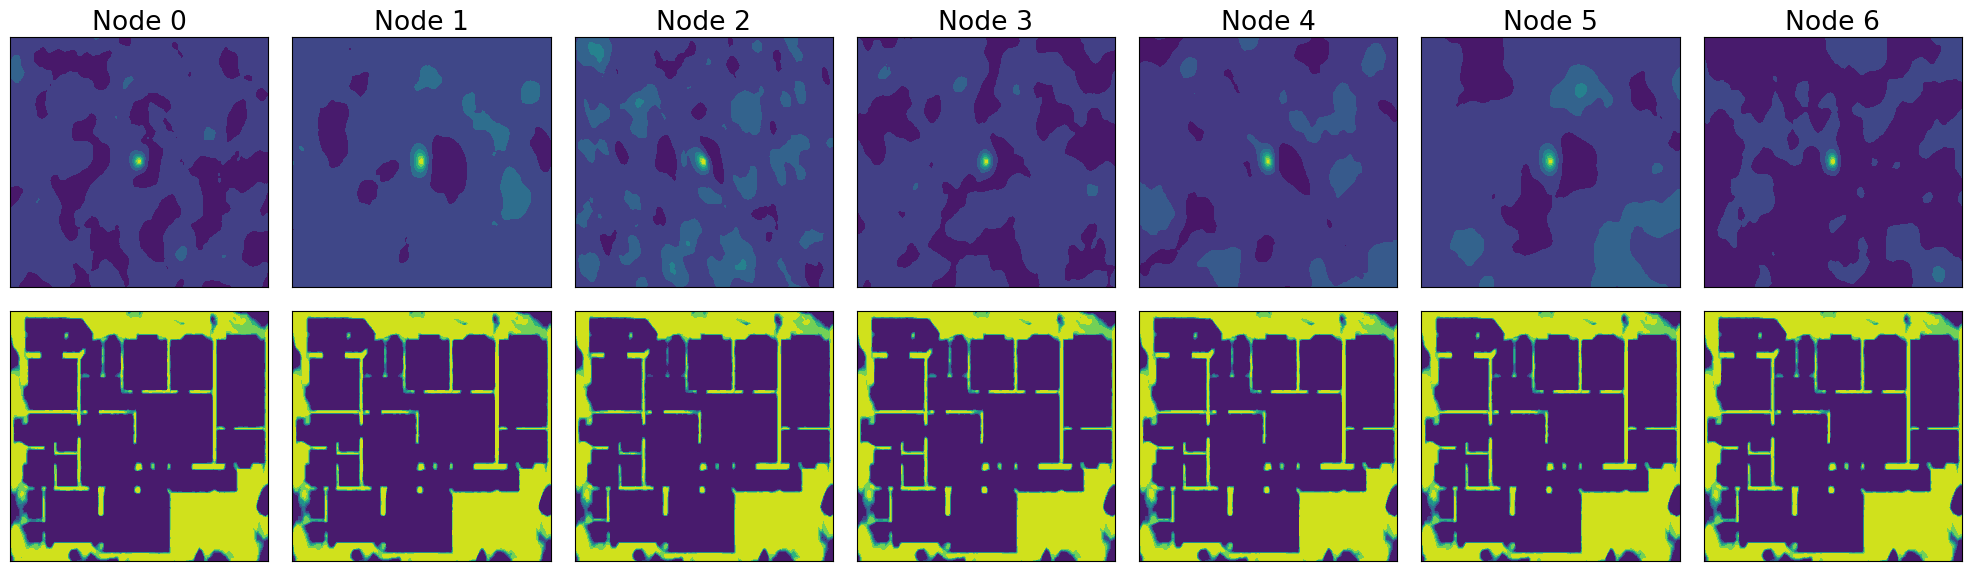

In [9]:
dens1 = results1["mesh_grid_density"]
dens2 = results2["mesh_grid_density"]
locs = results3["mesh_inputs"]

N = 7
(fig, axs) = plt.subplots(nrows=2, ncols=N, figsize=(20, 6), tight_layout=True)

for i in range(N):
    pred1 = (torch.squeeze(dens1[-1]))[i, :]
    axs[0, i].tricontourf(locs[:, 0], locs[:, 1], pred1)
    axs[0, i].set_title("Node {}".format(i))
    axs[0, i].set_xticklabels([])
    axs[0, i].set_xticks([])
    axs[0, i].set_yticklabels([])
    axs[0, i].set_yticks([])
    pred2 = (torch.squeeze(dens2[-1]))[i, :]
    axs[1, i].tricontourf(locs[:, 0], locs[:, 1], pred2)
    axs[1, i].set_xticklabels([])
    axs[1, i].set_xticks([])
    axs[1, i].set_yticklabels([])
    axs[1, i].set_yticks([])

fig.savefig("odense_mesh.svg")

/tmp/ipykernel_3655253/1832760525.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = list(cm.get_cmap("Dark2").colors)


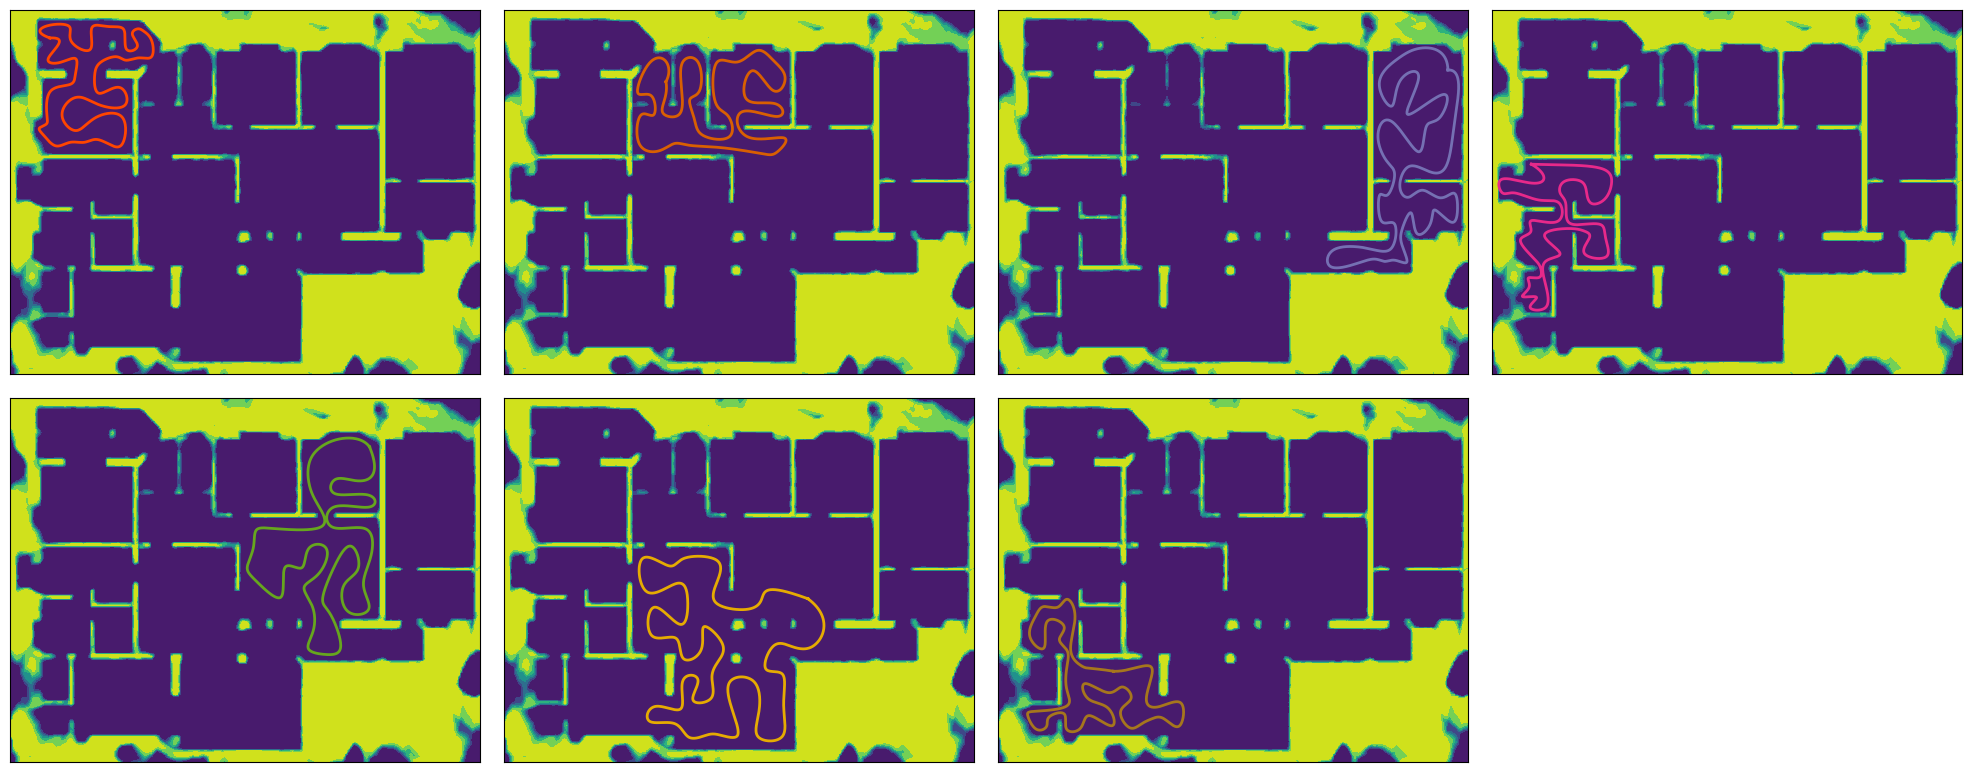

In [11]:
dens1 = results2["mesh_grid_density"]
# dens2 = results2["mesh_grid_density"]
locs = results1["mesh_inputs"]

N = 7
(fig, axs) = plt.subplots(nrows=2, ncols=4, figsize=(20, 8), tight_layout=True)
axs[1, 3].remove()
colors = list(cm.get_cmap("Dark2").colors)
colors[0] = "orangered"

i = 0
for ax in axs.flatten():
    if i == 7:
        break
    # Waypoint Settings
    wp_names = glob.glob1(os.path.join(data_dir, waypoint_subdir), "*.npy") 
    
    wp_path = os.path.join(data_dir, waypoint_subdir, wp_names[i])
    wps = np.load(wp_path)
    dataset = OnlineTrajectoryLidarDataset(lidar, wps, 
        spline_res, num_scans_in_window)

    # pred2 = (torch.squeeze(results_solo[i]["mesh_grid_density"]))
    pred1 = (torch.squeeze(dens1[-1]))[i, :]
    
    ax.tricontourf(locs[:, 0], locs[:, 1], pred1)
    ax.plot(dataset.scan_locs[:, 0], dataset.scan_locs[:, 1], linewidth=2, color=colors[i])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.set_yticks([])
    i += 1

fig.savefig("odense_mesh_inds.svg")

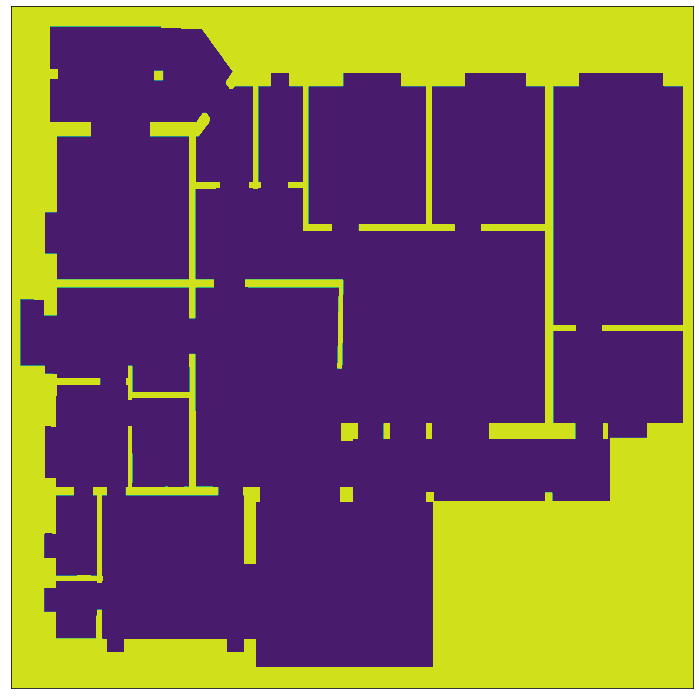

In [30]:
fig, ax = plt.subplots(tight_layout=True, figsize=(10, 10))
X, Y = np.meshgrid(lidar.xs, lidar.ys)
ax.contourf(X, Y, lidar.img)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])

fig.savefig("odense_ground_truth.svg")

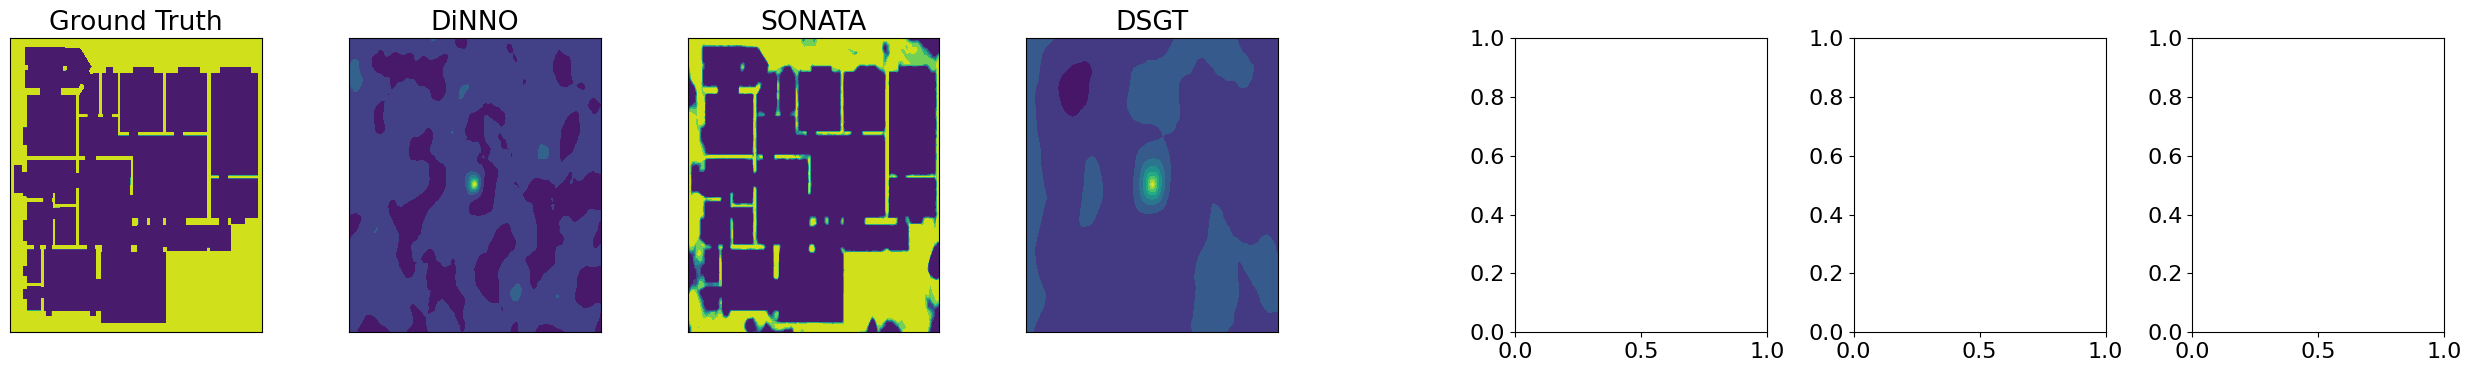

In [10]:
dens1 = results1["mesh_grid_density"]
dens2 = results2["mesh_grid_density"]
dens3 = results4["mesh_grid_density"]
locs = results1["mesh_inputs"]

(fig, axs) = plt.subplots(nrows=1, ncols=8, figsize=(25, 4), tight_layout=True, 
    gridspec_kw=dict(width_ratios=[4,4,4,4,1,4,4,4], hspace=0))
X, Y = np.meshgrid(lidar.xs, lidar.ys)
axs[0].contourf(X, Y, lidar.img)
axs[0].set_title("Ground Truth")
axs[0].set_xticklabels([])
axs[0].set_xticks([])
axs[0].set_yticklabels([])
axs[0].set_yticks([])

axs[1].tricontourf(locs[:, 0], locs[:, 1], (torch.squeeze(dens1[-1]))[0, :])
axs[1].set_title("DiNNO")
axs[1].set_xticklabels([])
axs[1].set_xticks([])
axs[1].set_yticklabels([])
axs[1].set_yticks([])

axs[2].tricontourf(locs[:, 0], locs[:, 1], (torch.squeeze(dens2[-1]))[0, :])
axs[2].set_title("SONATA")
axs[2].set_xticklabels([])
axs[2].set_xticks([])
axs[2].set_yticklabels([])
axs[2].set_yticks([])

axs[3].tricontourf(locs[:, 0], locs[:, 1], (torch.squeeze(dens3[-1]))[0, :])
axs[3].set_title("DSGT")
axs[3].set_xticklabels([])
axs[3].set_xticks([])
axs[3].set_yticklabels([])
axs[3].set_yticks([])

axs[4].remove()

# for i in range(5, 8):    
#     pred2 = (torch.squeeze(results_solo[i-1]["mesh_grid_density"]))
#     axs[i].tricontourf(locs[:, 0], locs[:, 1], pred2)
#     axs[i].set_xticklabels([])
#     axs[i].set_xticks([])
#     axs[i].set_yticklabels([])
#     axs[i].set_yticks([])
#     axs[i].set_title("Node {}, Ind.".format(i))

fig.savefig("odense_allalg_mesh.png", dpi=800)

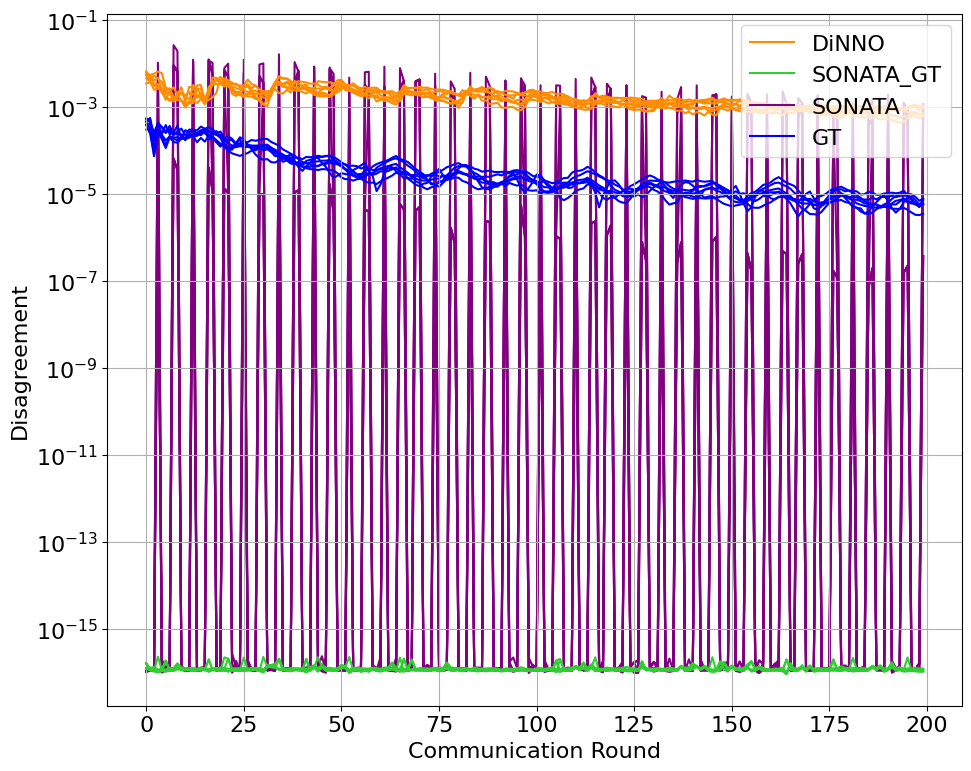

In [10]:
ag_cadmm = torch.vstack([v[1].reshape(1, -1) for v in results1["consensus_error"]])
ag_dsgt = torch.vstack([v[1].reshape(1, -1) for v in results2["consensus_error"]])
ag_dsgd = torch.vstack([v[1].reshape(1, -1) for v in results3["consensus_error"]])
ori_dsgt = torch.vstack([v[1].reshape(1, -1) for v in results4["consensus_error"]])

(fig, ax) = plt.subplots(figsize=(10, 8), tight_layout=True)
ax.plot(ag_cadmm[1:, :6], c=cadmm_color, zorder=3)
ax.plot(ag_cadmm[1:, 6], c=cadmm_color, label="DiNNO", zorder=3)

ax.plot(ag_dsgt[1:, :6], c=dsgt_color, zorder=2)
ax.plot(ag_dsgt[1:, 6], c=dsgt_color, label="SONATA_GT", zorder=2)

ax.plot(ag_dsgd[1:, :6], c=dsgd_color, zorder=1)
ax.plot(ag_dsgd[1:, 6], c=dsgd_color, label="SONATA", zorder=1)
ax.plot(ori_dsgt[1:, :6], c=ori_color, zorder=1)
ax.plot(ori_dsgt[1:, 6], c=ori_color, label="GT", zorder=1)

ax.set_yscale("log")
ax.grid()
ax.set_xlabel("Communication Round")
ax.set_ylabel("Disagreement")
ax.legend(loc=1)
fig.savefig("odense_agree.svg")

In [25]:
print(ag_dsgd[0])

tensor([8.5557e-17, 8.5557e-17, 8.5557e-17, 8.5557e-17, 8.5557e-17, 8.5557e-17,
        8.5557e-17], dtype=torch.float64)


In [ ]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
import math

def MSE(X_test, X_hat, start_time = 0):

    mse_per_frame = np.mean(((X_test[:, start_time:] - X_hat[:, start_time:])**2), axis=(2,3))
    mse_score = np.mean( (X_test[:, start_time:] - X_hat[:, start_time:])**2 )

    return mse_score, mse_per_frame


def SSIM(X_test, X_hat, start_time = 0):

    num_images, num_timesteps, _, _ = X_test.shape
    ssim_values = []

    for idx in range(num_images):
        for t in range(start_time, num_timesteps):
            img_truth =  X_test[idx,t,:,:]
            img_hat = X_hat[idx,t,:,:]
            ssim_img = ssim(img_truth, img_hat, data_range=img_truth.max() - img_truth.min())
            if math.isnan(ssim_img):
                continue
            ssim_values.append(ssim_img)

    ssim_model = np.mean(ssim_values)

    return ssim_model, ssim_values

In [73]:
print(locs[0, :],locs[27, :])
print(locs.shape)
print(lidar.img.shape[0],lidar.img.shape[1])
xlocs = X[::8, ::8].reshape(-1, 1)
print(xlocs.shape)
ylocs = Y[::8, ::8].reshape(-1, 1)

tensor([-1083.5000,  -804.0000], dtype=torch.float64) tensor([-867.4003, -804.0000], dtype=torch.float64)
torch.Size([54471, 2])
1608 2167
(54471, 1)


tensor(0.3865, dtype=torch.float64)


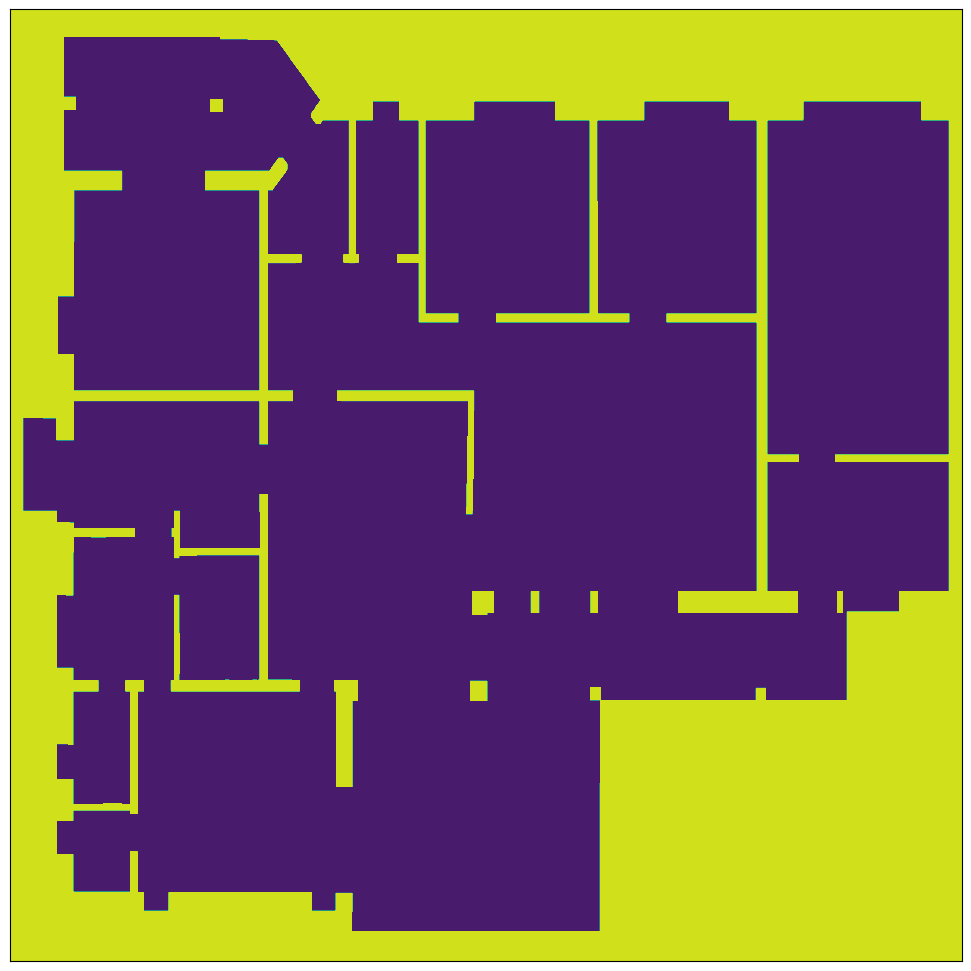

In [75]:
fig, ax = plt.subplots(tight_layout=True, figsize=(10, 10))
X, Y = np.meshgrid(lidar.xs, lidar.ys)
xlocs = X[::8, ::8].reshape(-1, 1)
ylocs = Y[::8, ::8].reshape(-1, 1)
ax.contourf(X, Y, lidar.img)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])
dens= results3["mesh_grid_density"]
# dens2 = results2["mesh_grid_density"]

locs = results3["mesh_inputs"]
pred= (torch.squeeze(dens[-1]))[0, :]
# axs[0, i].tricontourf(locs[:, 0], locs[:, 1], pred)

def MSE(pred, gt,locs):
    error=0
    height=201
    width=271
    x_i=0
    y_i=0
 
    error = 0
 
 
 
    for i in range(locs.shape[0]):
        x_i = i % width
        y_i = i // width
        # 计算对应的 gt 索引
        gt_x = min(x_i * 8, gt.shape[0] - 1)
        gt_y = min(y_i * 8, gt.shape[1] - 1)
        # 累加误差
        error += (pred[i] - gt[gt_x, gt_y]) ** 2

    error /= locs.shape[0]
    return error
# def MSE(pred, gt,locs):
#     error=0
#     height=201
#     width=271
#     x_i=0
#     y_i=0
#     for i in range(locs.shape[0]):
#         if(i%width==0 and i!=0):
#             y_i+=1
#             x_i=0
#         if (y_i ==0):
#             if(x_i==0):
#                 error+=(pred[i]-gt[0,0])**2
#             else:
#                 error+=(pred[i]-gt[x_i*8-1,y_i])**2
#         else:
#             if(x_i==0):
#                 error+=(pred[i]-gt[0,y_i*8-1])**2
#             else:
#                 error+=(pred[i]-gt[x_i*8-1,y_i*8-1])**2
#         x_i+=1
#     error/=locs.shape[0]
#     return error
print(MSE(pred,lidar.img,locs))